# Linear Regression

In [1]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
!pip install matplotlib 

# Import Libraries

In [2]:
!pip install numpy

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import csv

In [5]:
df=pd.read_csv('data/Salary.csv')

In [6]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Describe

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


# Set X and Y

In [13]:
#Data preprocessing
x=df.iloc[:,0].values #remember iloc and loc[:,'column'] : means to select all rows
y=df.iloc[:,1].values
print(y)

[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [10]:
print(type(x))

<class 'numpy.ndarray'>


In [11]:
print(x,y)

[ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.2  3.7  3.9  4.   4.   4.1
  4.5  4.9  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6
 10.3 10.5] [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


# Using loc

In [16]:
#Data preprocessing
x=df.loc[:,'YearsExperience'].values #remember iloc and loc[:,'column'] : means to select all rows
y=df.loc[:,'Salary'].values

x=x.reshape(-1,1)

In [17]:
print(x,y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]] [ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [14]:
print(x.shape,y.shape)

(30, 1) (30,)


# Split dataset

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [16]:
print(x_train.shape)
print(x_test.shape)

(24, 1)
(6, 1)


# Linear Regression

In [17]:
regresser=LinearRegression()

In [18]:
model=regresser.fit(x_train,y_train)

# Get Coefficient and Intercept

    y = coef_ * x + intercept_

In [19]:
print(model.coef_)
print(model.intercept_)

[9504.98248109]
25375.305271282858


# Predict on testm data

In [20]:
y_pred=model.predict(x_test)
print(y_pred)
print('******')
print(y_test)

[ 71949.71942864  55791.24921078  53890.25271456 115672.63884167
  44385.27023347  63395.23519566]
******
[ 67938.  64445.  60150. 116969.  43525.  55794.]


# Evaluate

In [21]:
from sklearn.metrics import r2_score
import numpy as np

In [22]:
r_squared = r2_score(y_test,y_pred)
print("The R2 error is :", r_squared)

The R2 error is : 0.940882728477622


 93.9 % of the variance in the dependent variable (the target) can be explained by the independent variables (the features) in the regression model

# Predict custom

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [24]:
print((mean_squared_error(y_test,y_pred)))

31727520.866778105


In [25]:
#predict future
custom_value=np.array([[13]])
print(model.predict(custom_value))

[148940.0775255]


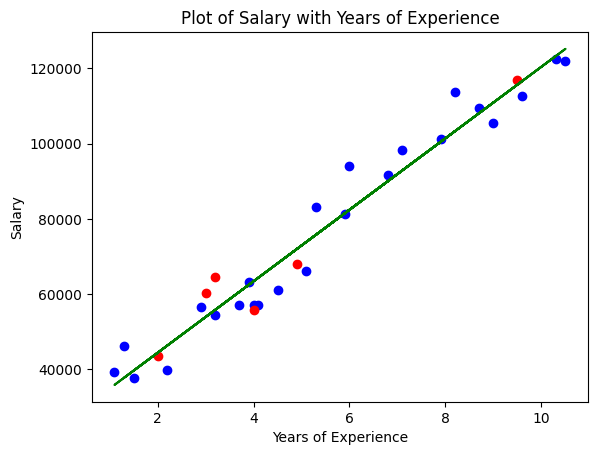

In [26]:
#plotting
plt.title("Plot of Salary with Years of Experience")
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.scatter(x_train,y_train,c='b')
plt.scatter(x_test,y_test,c='r')
plt.plot(x_train,regresser.predict(x_train),c='g')